<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Llama_3_2_OCR_Together_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install --upgrade together

In [ ]:
import together
import os
from google.colab import userdata

# set your API key
os.environ["TOGETHER_API_KEY"] = userdata.get('TOGETHER_API_KEY')

# list available models and descriptons
models = together.Models.list()

<ipython-input-4-b00b997550e1>:9: DeprecationWarning: Call to deprecated function list.
  models = together.Models.list()


In [ ]:
from PIL import Image
from IPython.display import Markdown, display

display(Markdown("## Llama 3.2 OCR"))

## Llama 3.2 OCR

In [ ]:
models = together.Models.list()

<ipython-input-6-7118bf3c7eff>:1: DeprecationWarning: Call to deprecated function list.
  models = together.Models.list()


In [ ]:
for model in models:
    if "Vision" in model['id'] :
        print(model['id'])
        # print(model['pricing'])


meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo
meta-llama/Llama-Vision-Free
meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo
meta-llama/Llama-Guard-3-11B-Vision-Turbo
SG161222/Realistic_Vision_V3.0_VAE


In [ ]:
model = "meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo"

## Using with WebURLs

In [ ]:
from together import Together

client = Together()

getDescriptionPrompt = "You are a UX/UI designer. Describe the attached screenshot or UI mockup in detail. I will feed in the output you give me to a coding model that will attempt to recreate this mockup, so please think step by step and describe the UI in detail. Pay close attention to background color, text color, font size, font family, padding, margin, border, etc. Match the colors and sizes exactly. Make sure to mention every part of the screenshot including any headers, footers, etc. Use the exact text from the screenshot."

imageUrl = "https://techcrunch.com/wp-content/uploads/2024/11/Screenshot-2024-11-14-at-4.28.53PM-e1731619815936.png?w=535"

stream = client.chat.completions.create(
    model="meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": getDescriptionPrompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": imageUrl,
                    },
                },
            ],
        }
    ],
    stream=True,
)

# Safer way to handle streaming chunks
try:
    for chunk in stream:
        if hasattr(chunk, 'choices') and chunk.choices:
            if hasattr(chunk.choices[0], 'delta'):
                if hasattr(chunk.choices[0].delta, 'content'):
                    content = chunk.choices[0].delta.content
                    if content is not None:
                        print(content, end="", flush=True)
except Exception as e:
    print(f"\nAn error occurred: {str(e)}")

The image depicts a user interface (UI) design for a health and fitness app, featuring a clean and modern layout. The UI is designed to be user-friendly and easy to navigate, with a focus on providing a seamless experience for users.

Here are the key elements of the UI:

**Header Section**

* The header section is located at the top of the page and features a welcome message that reads, "Welcome to your Thrive AI Coach." The text is displayed in a clear, easy-to-read font and is accompanied by a brief description of the app's features.
* The header section also includes a navigation menu with options to access different parts of the app, such as "Can you provide a summary of my daily activity?" and "What were my heart rate over the last week?"

**Main Content Section**

* The main content section is the largest part of the page and features a grid layout with various sections and cards.
* Each section or card has a title, a brief description, and a call-to-action (CTA) button. The tit

## Local Images

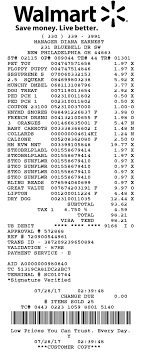

In [ ]:
img_path = "/content/bill.png"

image = Image.open(img_path).convert("RGB")
image

In [ ]:
from together import Together
import base64

client = Together()

getDescriptionPrompt = "what is in the image"

imagePath = "/content/bill.png"

def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

try:
    base64_image = encode_image(imagePath)

    stream = client.chat.completions.create(
        model="meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": getDescriptionPrompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        },
                    },
                ],
            }
        ],
        stream=True,
    )

    # Improved stream handling with proper checks
    for chunk in stream:
        # Check if chunk has choices
        if not hasattr(chunk, 'choices') or not chunk.choices:
            continue

        # Check if first choice exists and has delta
        choice = chunk.choices[0]
        if not hasattr(choice, 'delta'):
            continue

        # Check if delta has content
        delta = choice.delta
        if not hasattr(delta, 'content'):
            continue

        # Print content if it exists
        content = delta.content
        if content is not None:
            print(content, end="", flush=True)

except FileNotFoundError:
    print(f"Error: Could not find image file at {imagePath}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

The image is a receipt from Walmart, showing the purchase of various dog-related items. The receipt includes the date, time, and total amount paid, as well as a list of the items purchased and their individual prices. The receipt also features a barcode at the bottom, which can be used to track the purchase and provide additional information about the transaction.

## My Edited Version

In [ ]:
from together import Together
import base64
import os
import imghdr

class ImageProcessor:
    def __init__(self):
        self.client = Together()
        self.prompt = "What is this?"
        self.model = "meta-llama/Llama-3.2-11B-Vision-Instruct-Turbo"

    def get_mime_type(self, image_path):
        """Determine MIME type based on actual image format using imghdr"""
        img_type = imghdr.what(image_path)
        if img_type:
            return f'image/{img_type}'
        # Fallback to extension-based detection
        extension = os.path.splitext(image_path)[1].lower()
        mime_types = {
            '.png': 'image/png',
            '.jpg': 'image/jpeg',
            '.jpeg': 'image/jpeg',
            '.gif': 'image/gif',
            '.webp': 'image/webp'
        }
        return mime_types.get(extension, 'image/jpeg')

    def encode_image(self, image_path):
        """Encode image to base64 with error handling"""
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"Image file not found: {image_path}")

        try:
            with open(image_path, "rb") as image_file:
                return base64.b64encode(image_file.read()).decode('utf-8')
        except Exception as e:
            raise Exception(f"Error encoding image: {str(e)}")

    def analyze_image(self, image_path):
        """Analyze image using Together API with proper error handling"""
        try:
            # Encode image and get MIME type
            base64_image = self.encode_image(image_path)
            mime_type = self.get_mime_type(image_path)

            # Create API request
            stream = self.client.chat.completions.create(
                model=self.model,
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": self.prompt},
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:{mime_type};base64,{base64_image}"
                                },
                            },
                        ],
                    }
                ],
                stream=True,
            )

            # Process streaming response
            response_text = ""
            for chunk in stream:
                if hasattr(chunk, 'choices') and chunk.choices:
                    if hasattr(chunk.choices[0], 'delta'):
                        if hasattr(chunk.choices[0].delta, 'content'):
                            content = chunk.choices[0].delta.content
                            if content is not None:
                                print(content, end="", flush=True)
                                response_text += content

            return response_text

        except FileNotFoundError as e:
            print(f"File Error: {str(e)}")
            raise
        except Exception as e:
            print(f"Error during image analysis: {str(e)}")
            raise

In [ ]:
# Example usage
processor = ImageProcessor()
processor.prompt = "What is in the image?"


processor.prompt

'What is in the image?'

In [ ]:
SYSTEM_PROMPT = """Convert the provided image into Markdown format. Ensure that all content from the page is included, such as headers, footers, subtexts, images (with alt text if possible), tables, and any other elements.

  Requirements:

  - Output Only Markdown: Return solely the Markdown content without any additional explanations or comments.
  - No Delimiters: Do not use code fences or delimiters like \`\`\`markdown.
  - Complete Content: Do not omit any part of the page, including headers, footers, and subtext.
  """

In [ ]:
processor.prompt = SYSTEM_PROMPT

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/bill.png",
        "/content/photo.jpg",
        # "/content/image.webp"
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/bill.png...
# Walmart
## Save money. Live better.

|  |  |  |
| --- | --- | --- |
| ST# | 02115 | 055044 |
| CM# | 44 | T# | 01301 |
| PET TOT | $0.00 |  |
| FET TOT | $0.00 |  |
| FISITTY NUPPY | $0.00 |  |
| SUBTOTAL $ | $0.00 |  |
| TAX 1 | $0.00 |  |
| TOTAL | $0.00 |  |

| DEBIT | APPROVED # | SUBTOTAL | TAX 1 | TOTAL |  |
| --- | --- | --- | --- | --- | --- |
| VISA |  | $99.21 | $0.21 | $99.42 |  |
| CHECK |  | $0.00 | $0.00 | $0.00 |  |
| TRANS ID |  |  |  |  |  |
| PAYMENT SERVICE |  |  |  |  |  |
| AID |  |  |  |  |  |
| TC |  |  |  |  |  |
| TERMINAL # |  |  |  |  |  |
| *Signature Verified* |  |  |  |  |  |

| CHANGE DUE |  |  |  |  |  |
|  |  |  |  |  |  |
| TC# | 0443 | 0227 | 0141 | 5140 |  |
|  |  |  |  |  |  |
| Live Primes You Can Trust. Every Day. |  |  |  |  |  |
|  |  |  |  |  |  |
| 07/24/17 |  |  |  |  |  |
|  |  |  |  |  |  |
| ***CUSTOMER 007*** |  |  |  |  |  |

|  |  |  |  |  |  |
|  |  |  |  |  |  |
Analyzing /content/photo.jpg...
File Er

In [ ]:

processor = ImageProcessor()
processor.prompt = SYSTEM_PROMPT
processor.model = "meta-llama/Llama-3.2-90B-Vision-Instruct-Turbo"

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/bill.png",
        "/content/photo.jpg",
        # "/content/image.webp"
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/bill.png...
**Walmart Receipt**

*   **Header**
    *   **Walmart Logo**: A white starburst logo with the text "Walmart" in bold, black font.
    *   **Tagline**: "Save money. Live better." in smaller text below the logo.
    *   **Store Information**:
        *   **Store Name**: Walmart
        *   **Address**: 1 Bluebell Dr, New Philadelphia, OH 44663
        *   **Phone Number**: (330) 339-4444
*   **Receipt Details**
    *   **Date**: 07/28/17
    *   **Time**: 02:30:45
    *   **Transaction Number**: 0221 1059 9601 5140
    *   **Cashier**: 0221
*   **Items Purchased**
    *   **Item 1**: SUGARBEET
        *   **Quantity**: 1
        *   **Unit Price**: $1.97
        *   **Total**: $1.97
    *   **Item 2**: SUGARBEET
        *   **Quantity**: 1
        *   **Unit Price**: $1.97
        *   **Total**: $1.97
    *   **Item 3**: SUGARBEET
        *   **Quantity**: 1
        *   **Unit Price**: $1.97
        *   **Total**: $1.97
    *   **Item 4**: SUGARBEET
      

In [ ]:
try:
    # Example with different image types
    image_paths = [
        "/content/page.png",
    ]

    for image_path in image_paths:
        print(f"\nAnalyzing {image_path}...")
        processor.analyze_image(
            image_path
        )

except Exception as e:
    print(f"An error occurred: {str(e)}")


Analyzing /content/page.png...
### Introduction

This description of the great war, and its following results, is perhaps the greatest ever written by an author, on the line of any fabulous war, that could ever be intitled, with such a nae name. The war lasted about 7 years and 7 months in this story, and the author of this book has taken over eleven years in writing out the long and graphic details, and has fought on from day, to day, in order to win for the christ ian sd side this long and bloody war, and though the christ ians had been threatened with defeat, on account of a strange Aronburg mystery which could not be solved by any one, not even myself, they finally won when they turned the tide against the enemy at the frightful battle of Aronburgs Run.

The Aronburg mystery as well as the murder of the Aronburg child, had threat ened the doom of the christian states, for the whole length of the great Glandelinian war, and it was predicted that the solving of the Aronburg mystery 

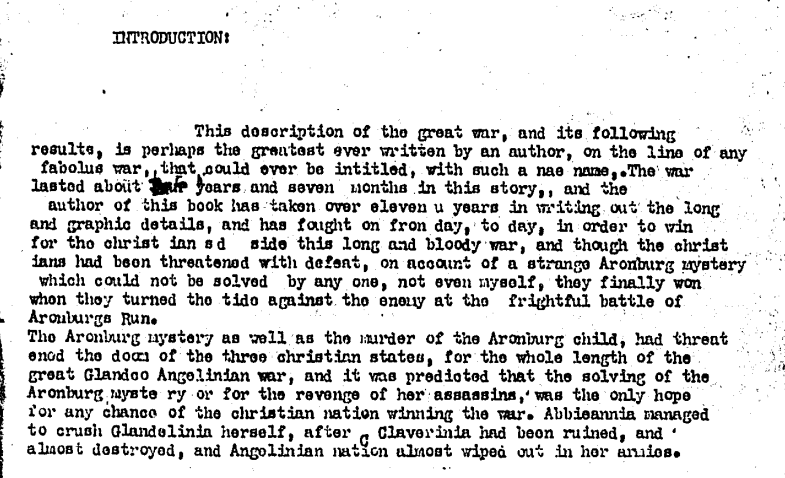

In [ ]:
img_path = "/content/page.png"

image = Image.open(img_path).convert("RGB")
image

## Original Javascript Version

In [ ]:
import os
import base64
from typing import Optional, Literal
from together import Together

def encode_image(image_path: str) -> str:
    """Read and encode image to base64."""
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def is_remote_file(file_path: str) -> bool:
    """Check if the file path is a remote URL."""
    return file_path.startswith(('http://', 'https://'))

async def get_markdown(
    together: Together,
    vision_llm: str,
    file_path: str
) -> str:
    """Process image and convert to markdown using Together AI."""
    system_prompt = """Convert the provided image into Markdown format. Ensure that all content from the page is included, such as headers, footers, subtexts, images (with alt text if possible), tables, and any other elements.
    Requirements:
    - Output Only Markdown: Return solely the Markdown content without any additional explanations or comments.
    - No Delimiters: Do not use code fences or delimiters like ```markdown.
    - Complete Content: Do not omit any part of the page, including headers, footers, and subtext.
    """

    final_image_url = file_path if is_remote_file(file_path) else f"data:image/jpeg;base64,{encode_image(file_path)}"

    output = await together.chat.completions.create(
        model=vision_llm,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": system_prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": final_image_url
                        }
                    }
                ]
            }
        ]
    )

    return output.choices[0].message.content

async def ocr(
    file_path: str,
    api_key: Optional[str] = None,
    model: Literal["Llama-3.2-90B-Vision", "Llama-3.2-11B-Vision", "free"] = "Llama-3.2-90B-Vision"
) -> str:
    """
    Perform OCR on an image using Together AI.

    Args:
        file_path: Path to the image file or URL
        api_key: Together AI API key (defaults to TOGETHER_API_KEY environment variable)
        model: Model to use for vision processing

    Returns:
        Markdown formatted text from the image
    """
    if api_key is None:
        api_key = os.getenv('TOGETHER_API_KEY')
        if api_key is None:
            raise ValueError("API key must be provided either directly or through TOGETHER_API_KEY environment variable")

    vision_llm = f"meta-llama/{model}-Instruct-Turbo" if model != "free" else "meta-llama/Llama-Vision-Free"

    together = Together(api_key=api_key)
    final_markdown = await get_markdown(together, vision_llm, file_path)

    return final_markdown

## Pricing for together Image tokens

For vision models images are converted to 1,601 to 6,404 tokens depending on image size. Together currently use this formula to calculate the number of tokens in an image:

(T= tokens, H=height, W=width)

In [ ]:
T = min(2, max(H // 560, 1)) * min(2, max(W // 560, 1)) * 1601

NameError: name 'H' is not defined